# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint 
#from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric" + '&appid=' + weather_api_key + '&q='

In [4]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
    
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Latitude": city_lat, 
                          "Longitude": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

 
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hammerfest
Processing Record 2 of Set 1 | kingston
Processing Record 3 of Set 1 | bilibino
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | pangkalanbuun
Processing Record 6 of Set 1 | alofi
Processing Record 7 of Set 1 | college
Processing Record 8 of Set 1 | ust-nera
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | arraias
Processing Record 11 of Set 1 | dudinka
Processing Record 12 of Set 1 | ma'rib
Processing Record 13 of Set 1 | kyren
Processing Record 14 of Set 1 | arcachon
Processing Record 15 of Set 1 | ancud
Processing Record 16 of Set 1 | talnakh
Processing Record 17 of Set 1 | petropavlovsk-kamchatsky
Processing Record 18 of Set 1 | kurumkan
Processing Record 19 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 20 of Set 1 | magadan
Processing Record 21 of Set 1 | west island
Processing Record 22 of Set 1 | la ronge


Processing Record 38 of Set 4 | sanawad
Processing Record 39 of Set 4 | tazovsky
Processing Record 40 of Set 4 | kailua-kona
Processing Record 41 of Set 4 | pudasjarvi
Processing Record 42 of Set 4 | kem'
Processing Record 43 of Set 4 | kauhajoki
Processing Record 44 of Set 4 | brisas de zicatela
Processing Record 45 of Set 4 | puerto baquerizo moreno
Processing Record 46 of Set 4 | miquelon
Processing Record 47 of Set 4 | marquette
Processing Record 48 of Set 4 | crane
Processing Record 49 of Set 4 | along
Processing Record 0 of Set 5 | aliganj
Processing Record 1 of Set 5 | castlegar
Processing Record 2 of Set 5 | westport
Processing Record 3 of Set 5 | iskateley
Processing Record 4 of Set 5 | weno
Processing Record 5 of Set 5 | sepuka
Processing Record 6 of Set 5 | cidreira
Processing Record 7 of Set 5 | tonota
Processing Record 8 of Set 5 | erenhot
Processing Record 9 of Set 5 | kingscliff
Processing Record 10 of Set 5 | kayangel
Processing Record 11 of Set 5 | inarajan village
Pro

Processing Record 30 of Set 8 | bryne
Processing Record 31 of Set 8 | terbanggi besar
Processing Record 32 of Set 8 | kenai
Processing Record 33 of Set 8 | naduvattam
Processing Record 34 of Set 8 | tarauaca
Processing Record 35 of Set 8 | ad dabbah
Processing Record 36 of Set 8 | haiku-pauwela
Processing Record 37 of Set 8 | urengoy
Processing Record 38 of Set 8 | qamdo
Processing Record 39 of Set 8 | tidjikja
Processing Record 40 of Set 8 | hasaki
Processing Record 41 of Set 8 | kalmunai
Processing Record 42 of Set 8 | mazamari
Processing Record 43 of Set 8 | kudahuvadhoo
Processing Record 44 of Set 8 | altai
Processing Record 45 of Set 8 | kourou
Processing Record 46 of Set 8 | taybad
Processing Record 47 of Set 8 | okha
Processing Record 48 of Set 8 | antonio enes
Processing Record 49 of Set 8 | ujae
Processing Record 0 of Set 9 | queenstown
Processing Record 1 of Set 9 | karak city
Processing Record 2 of Set 9 | zeya
Processing Record 3 of Set 9 | cerano
Processing Record 4 of Set

Processing Record 20 of Set 12 | aleksandrovsk-sakhalinskiy
Processing Record 21 of Set 12 | north bend
Processing Record 22 of Set 12 | merizo village
Processing Record 23 of Set 12 | kendari
Processing Record 24 of Set 12 | bima
Processing Record 25 of Set 12 | nguigmi
Processing Record 26 of Set 12 | los osos
Processing Record 27 of Set 12 | kushiro
Processing Record 28 of Set 12 | vila do maio
Processing Record 29 of Set 12 | the dalles
Processing Record 30 of Set 12 | punta del este
Processing Record 31 of Set 12 | asamankese
Processing Record 32 of Set 12 | mukah
City not found. Skipping...
Processing Record 33 of Set 12 | targu secuiesc
Processing Record 34 of Set 12 | mogadishu
Processing Record 35 of Set 12 | monopoli
Processing Record 36 of Set 12 | grand falls-windsor
Processing Record 37 of Set 12 | harstad
Processing Record 38 of Set 12 | port shepstone
Processing Record 39 of Set 12 | motygino
Processing Record 40 of Set 12 | shevchenkove
Processing Record 41 of Set 12 | 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Latitude      568
Longitude     568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hammerfest,70.6634,23.6821,-1.75,86,75,3.60,NO,1682282058
1,kingston,17.9970,-76.7936,29.00,75,91,0.97,JM,1682282132
2,bilibino,68.0546,166.4372,-4.33,64,52,2.29,RU,1682281887
3,puerto natales,-51.7236,-72.4875,11.25,54,75,3.60,CL,1682281963
4,pangkalanbuun,-2.6833,111.6167,24.55,97,95,0.89,ID,1682282133


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hammerfest,70.6634,23.6821,-1.75,86,75,3.60,NO,1682282058
1,kingston,17.9970,-76.7936,29.00,75,91,0.97,JM,1682282132
2,bilibino,68.0546,166.4372,-4.33,64,52,2.29,RU,1682281887
3,puerto natales,-51.7236,-72.4875,11.25,54,75,3.60,CL,1682281963
4,pangkalanbuun,-2.6833,111.6167,24.55,97,95,0.89,ID,1682282133


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

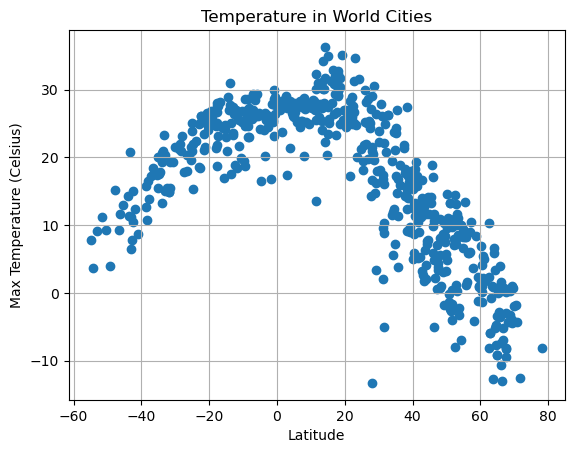

In [19]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Latitude'], city_data_df['Max Temp'], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Max Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

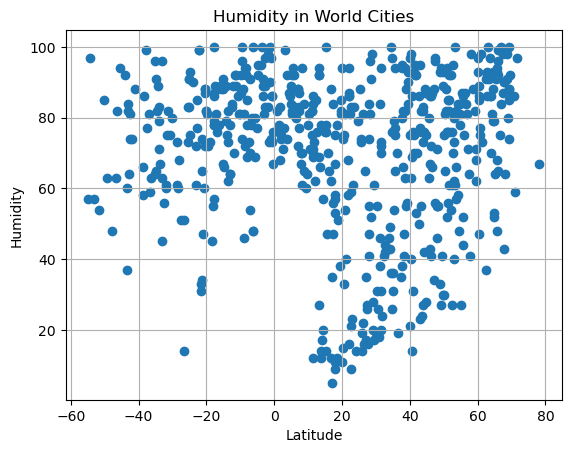

In [20]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Latitude'], city_data_df['Humidity'], marker="o")

# Incorporate the other graph properties

plt.title("Humidity in World Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

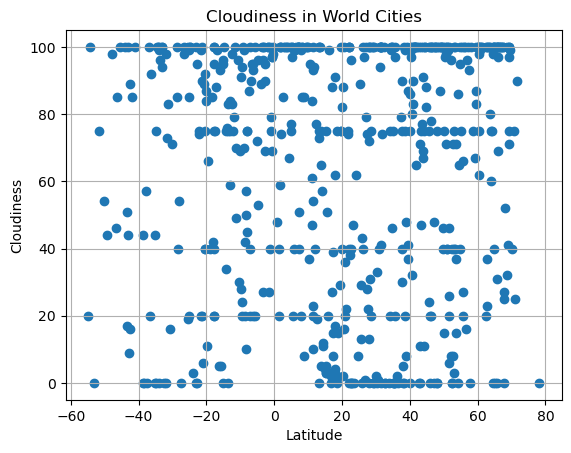

In [22]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Latitude'], city_data_df['Cloudiness'], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

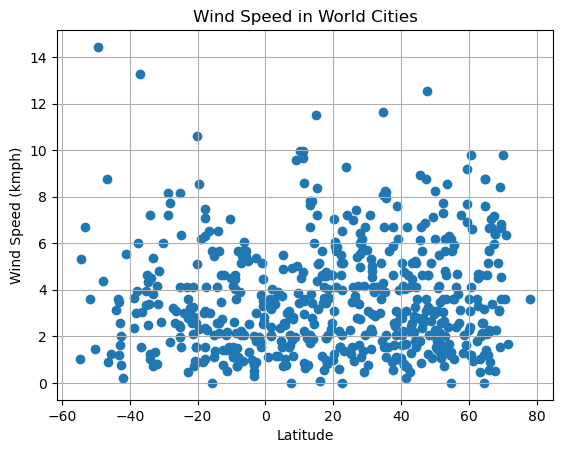

In [23]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Latitude'], city_data_df['Wind Speed'], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speed (kmph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [24]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x_values, y_values, y_label, title, corr):

    slope, intercept, rvalue, pvalue, stderr = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    corr_coeff, p_value = st.pearsonr(x_values, y_values)



    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values, color='steelblue')
    plt.plot(x_values,regress_values,"black")
    plt.annotate(line_eq, corr,fontsize=15,color="black")

    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    
    plt.show()
    print(f"Correlation coefficient: {corr_coeff:.2f}")

In [25]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_s = city_data_df['Latitude'] >= 0
#northern_hemi_df = pd.DataFrame([city for city in city_data if city['Latitude'] >= 0])
northern_hemi_df = city_data_df[northern_hemi_s]
# Display sample data
northern_hemi_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hammerfest,70.6634,23.6821,-1.75,86,75,3.60,NO,1682282058
1,kingston,17.9970,-76.7936,29.00,75,91,0.97,JM,1682282132
2,bilibino,68.0546,166.4372,-4.33,64,52,2.29,RU,1682281887
6,college,64.8569,-147.8028,-9.12,53,100,8.75,US,1682282133
7,ust-nera,64.5667,143.2000,-7.71,93,100,3.19,RU,1682282009


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
#southern_hemi_df = pd.DataFrame([city for city in city_data if city['Latitude'] < 0])
southern_hemi_df = city_data_df[~northern_hemi_s]
# Display sample data
southern_hemi_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,puerto natales,-51.7236,-72.4875,11.25,54,75,3.60,CL,1682281963
4,pangkalanbuun,-2.6833,111.6167,24.55,97,95,0.89,ID,1682282133
5,alofi,-19.0595,-169.9187,25.94,73,40,6.17,NU,1682282133
8,puerto ayora,-0.7393,-90.3518,29.98,86,69,4.47,EC,1682282134
9,arraias,-12.9288,-46.9437,23.37,64,84,2.74,BR,1682282134


###  Temperature vs. Latitude Linear Regression Plot

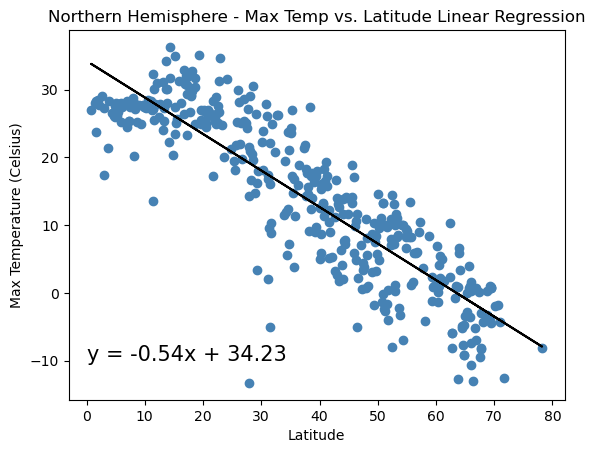

Correlation coefficient: -0.88


In [26]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Latitude"]
y_values = northern_hemi_df["Max Temp"]
title = "Northern Hemisphere - Max Temp vs. Latitude Linear Regression"
y_label = "Max Temperature (Celsius)"
corr = (0,-10)

plot_linear_regression(x_values, y_values, y_label, title, corr)

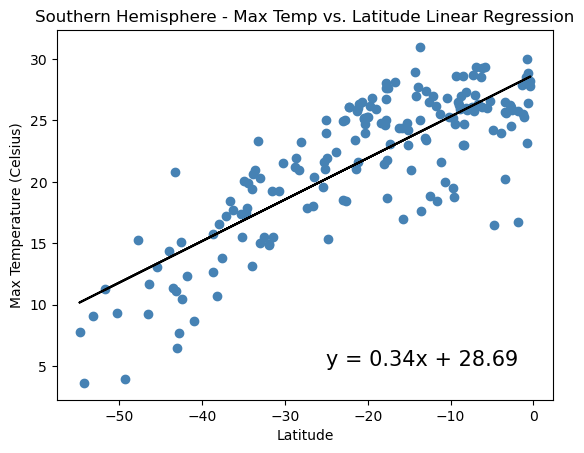

Correlation coefficient: 0.81


In [27]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Latitude"]
y_values = southern_hemi_df["Max Temp"]
title = "Southern Hemisphere - Max Temp vs. Latitude Linear Regression"
y_label = "Max Temperature (Celsius)"
corr = (-25,5)

plot_linear_regression(x_values, y_values, y_label, title, corr)

**Discussion about the linear relationship:** There is a stong negative linear relationship in the Northern Hemisphere and a strong positive linear relationship in the Southern Hemisphere. Although it will not be exact, you should be able to use this regression to dependbly predict the temp of the the city based on the latitude in both the northern and southern hemishperes.

### Humidity vs. Latitude Linear Regression Plot

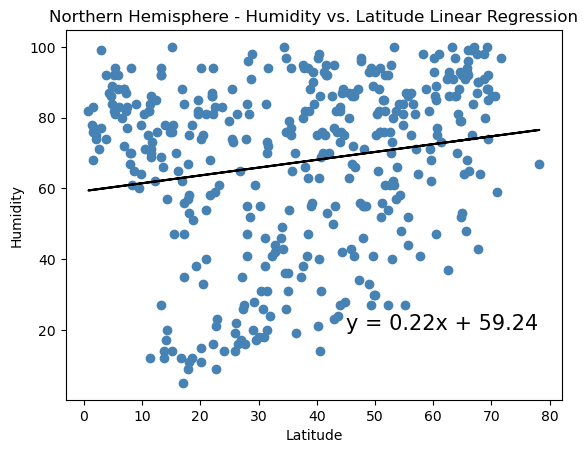

Correlation coefficient: 0.18


In [28]:
# Northern Hemisphere
x_values = northern_hemi_df["Latitude"]
y_values = northern_hemi_df["Humidity"]
title = "Northern Hemisphere - Humidity vs. Latitude Linear Regression"
y_label = "Humidity"
corr = (45,20)

plot_linear_regression(x_values, y_values, y_label, title, corr)

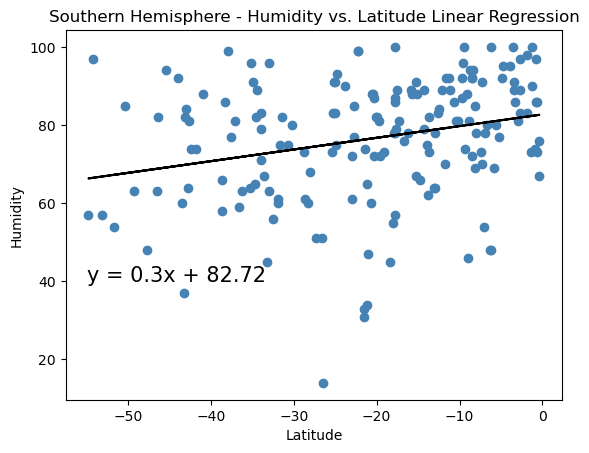

Correlation coefficient: 0.26


In [29]:
# Southern Hemisphere
x_values = southern_hemi_df["Latitude"]
y_values = southern_hemi_df["Humidity"]
title = "Southern Hemisphere - Humidity vs. Latitude Linear Regression"
y_label = "Humidity"
corr = (-55,40)

plot_linear_regression(x_values, y_values, y_label, title, corr)

**Discussion about the linear relationship:** While there is some linear relationship going on here in the Northern Hemisphere, it is extremly weak. In the Southern Hemisphere, it is also weak. It would not rely on either to accurately perdict the humitity based on the city' latitude.

### Cloudiness vs. Latitude Linear Regression Plot

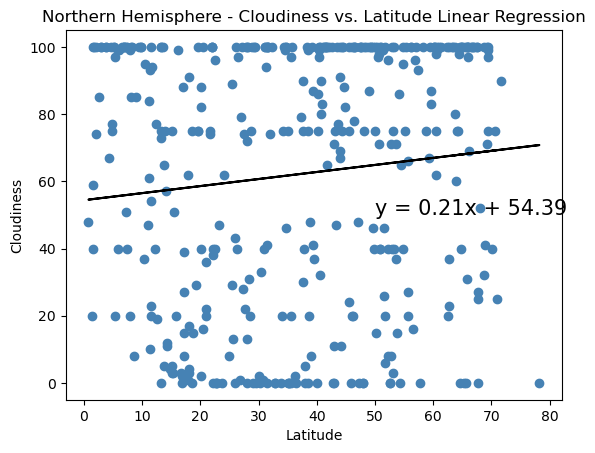

Correlation coefficient: 0.11


In [30]:
# Northern Hemisphere
x_values = northern_hemi_df["Latitude"]
y_values = northern_hemi_df["Cloudiness"]
title = "Northern Hemisphere - Cloudiness vs. Latitude Linear Regression"
y_label = "Cloudiness"
corr = (50,50)

plot_linear_regression(x_values, y_values, y_label, title, corr)

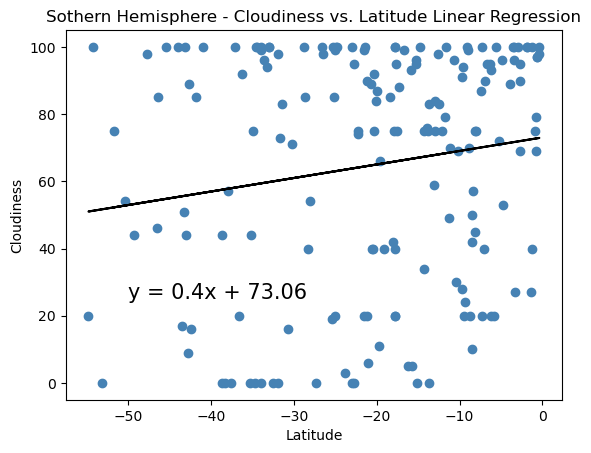

Correlation coefficient: 0.16


In [31]:
# Southern Hemisphere
x_values = southern_hemi_df["Latitude"]
y_values = southern_hemi_df["Cloudiness"]
title = "Sothern Hemisphere - Cloudiness vs. Latitude Linear Regression"
y_label = "Cloudiness"
corr = (-50, 25)

plot_linear_regression(x_values, y_values, y_label, title, corr)

**Discussion about the linear relationship:** According to the correlation coefficient in both the Northern and Southern Hemispheres, there is almost no correlation between the the city's latitude and the cloudiness taken as a whole.

### Wind Speed vs. Latitude Linear Regression Plot

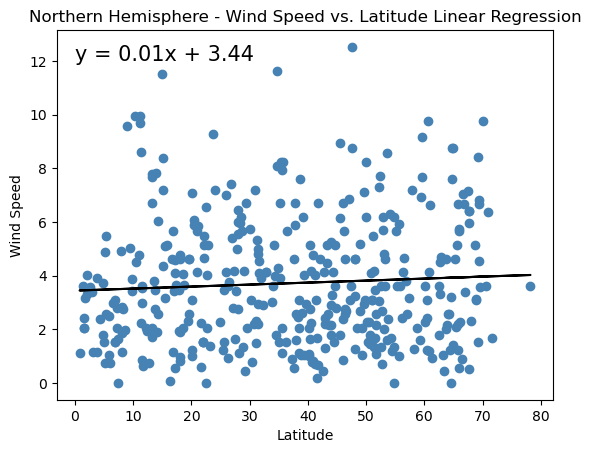

Correlation coefficient: 0.06


In [32]:
# Northern Hemisphere
x_values = northern_hemi_df["Latitude"]
y_values = northern_hemi_df["Wind Speed"]
title = "Northern Hemisphere - Wind Speed vs. Latitude Linear Regression"
y_label = "Wind Speed"
corr = (0,12)

plot_linear_regression(x_values, y_values, y_label, title, corr)

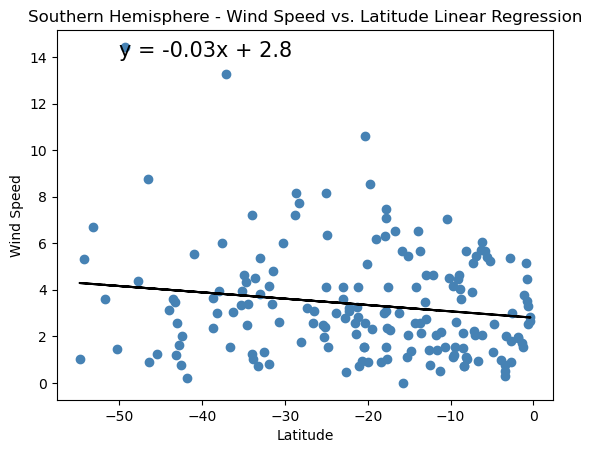

Correlation coefficient: -0.16


In [33]:
# Southern Hemisphere
x_values = southern_hemi_df["Latitude"]
y_values = southern_hemi_df["Wind Speed"]
title = "Southern Hemisphere - Wind Speed vs. Latitude Linear Regression"
y_label = "Wind Speed"
corr = (-50,14)

plot_linear_regression(x_values, y_values, y_label, title, corr)

**Discussion about the linear relationship:** Again, in the Northern Hemishphere, there is almost no linear relationship between the wind speed and the city's latitude. However, there is a very weak correlation in the Southern Hemisphere. That said, I would not use either line to accurately perdict the wind speed in either the Northern or Southern Hemisphere.